# Seasonality

In [36]:
from ruamel.yaml import YAML
import pandas as pd
from fredapi import Fred
from statsmodels.tsa import x13, stattools
import altair as alt

In [2]:
# Load the config settings
yaml=YAML(typ='safe')
with open("config.yml", "r") as config_file:
    config = yaml.load(config_file)

fred_api_key = config['fred-api-key']

In [3]:
fred = Fred(api_key=fred_api_key)

In [7]:
# All Employees, Total Nonfarm in Thousands of Persons monthly
emp_not_sa = fred.get_series("PAYNSA")
emp_sa = fred.get_series("PAYEMS")

In [8]:
df_not_sa = emp_not_sa.copy().reset_index().rename(columns={"index":"date", 0:"persons"})
df_not_sa['type'] = "Not Seasonally Adjusted"
df_sa = emp_sa.copy().reset_index().rename(columns={"index":"date", 0:"persons"})
df_sa['type'] = "Seasonally Adjusted"
e_df = pd.concat([df_not_sa, df_sa])

In [9]:
alt.Chart(emp_df).mark_line().encode(
    x=alt.X('date:T', axis = alt.Axis(title="Monthly")),
    y=alt.Y('persons:Q', axis = alt.Axis(title="Thousands of Persons")),
    color=alt.Color('type:N', legend = alt.Legend(title="Adjustment")),
    strokeDash='type',
).properties(
    title = "US Total All Nonfarm Employees"
)

alt.Chart(...)

In [14]:
y = x13.x13_arima_analysis(
    endog = emp_not_sa
)

/home/jonathan/projects/box_jenkins/.venv/lib/python3.8/site-packages/statsmodels/tsa/x13.py:187: X13Warning: NOTE: Unable to test AO2020.May due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS1946.Apr due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.May due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS1945.Aug due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable t

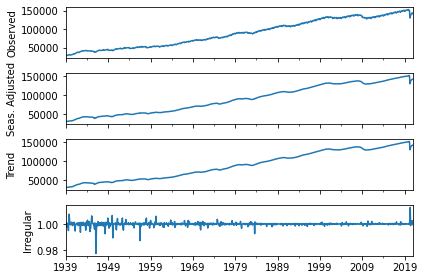

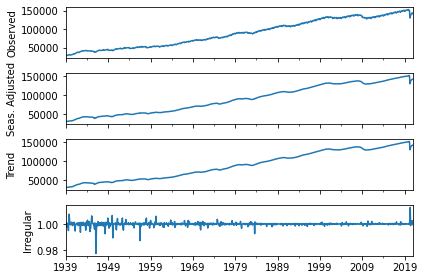

In [20]:
y.plot()

In [129]:
x, x_confint, qstat, qstat_pvalues = stattools.acf(y.seasadj.diff()[1:], nlags=24, fft=True, alpha=0.05, qstat=True)

In [132]:
acf = pd.DataFrame({
    "lags": range(1,24),
    "acf": x[1:24],
})
confint = pd.DataFrame({
    "lags": range(0,25),
    "low": x_confint[:,0] - x,
    "high": x_confint[:,1] - x
})
bar = alt.Chart(acf).mark_bar(clip=True).encode(
    x=alt.X("lags:Q",scale=alt.Scale(domain=(1, 23), zero=False)),
    y="acf"
)
co_low=alt.Chart(confint).mark_area(opacity=0.3,color='red', clip=True).encode(
    x=alt.X("lags:Q",scale=alt.Scale(domain=(1, 23), zero=False)),
    y="low"
)
co_high=alt.Chart(confint).mark_area(opacity=0.3,color='red', clip=True).encode(
    x=alt.X("lags:Q",scale=alt.Scale(domain=(1, 23), zero=False)),
    y="high"
)
(bar + co_low + co_high).properties(width=800, height=100)

alt.LayerChart(...)

In [128]:
x

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [125]:
y.seasadj.diff()

1939-01-01           NaN
1939-02-01    140.900200
1939-03-01    135.176577
1939-04-01     -1.550759
1939-05-01    156.955781
                 ...    
2020-10-01    920.466350
2020-11-01    301.569693
2020-12-01    267.925062
2021-01-01    472.231409
2021-02-01    545.765204
Name: seasadj, Length: 986, dtype: float64